In [1]:
from tsai.all import *
import os
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

In [2]:
def get_face_landmarks(csv_path):
    df = pd.read_csv(csv_path, usecols=[1,2,3])
    # print(df.head(10))
    df_x = df['x']
    df_y = df['y']
    df_z = df['z']
    face_x = df_x.values.tolist()
    face_y = df_y.values.tolist()
    face_z = df_z.values.tolist()

    print("There are {num} faces recorded from this sample.".format(num = np.array(face_x).shape[0] / 468))
    print(np.array(face_x).shape)

    return face_x, face_y, face_z, (np.array(face_x).shape[0] / 468)

def get_avg_landmarks(x, y, z, face_num):
    avg_x = []
    avg_y = []
    avg_z = []

    for i in range(468):
        temp = x[i:len(x):468]
        avg_x.append(np.sum(temp)/face_num)
    for i in range(468):
        temp = y[i:len(x):468]
        avg_y.append(np.sum(temp)/face_num)
    for i in range(468):
        temp = z[i:len(x):468]
        avg_z.append(np.sum(temp)/face_num)

    print(np.array(avg_x).shape)
    return avg_x, avg_y, avg_z


In [3]:
if __name__ == '__main__':
    computer_setup()

    face = []
    labels = []
    # 标签
    label = {b'healthy': 0, b'unhealthy': 1}

    root = os.path.dirname(os.getcwd())
    print("root direction", root)

    dataset_class = os.listdir(root + '/Dataset')
    print(dataset_class)

    # 遍历数据集的人脸信息
    for sample_class in dataset_class:
        sample_class_path = root + '/Dataset' + '/' + sample_class
        # print(sample_class_path)
        sample_file = os.listdir(sample_class_path)
        # print(sample_file)

        for detail in sample_file:
            detail_path = sample_class_path + '/' + detail
            sample_detail = os.listdir(detail_path)
            print(detail_path)

            for csv_file in sample_detail:
                if 'face_landmarks' in csv_file:
                    # 打开csv文件并读取人脸信息
                    print(detail_path + '/' + csv_file)
                    face_x, face_y, face_z, face_num = get_face_landmarks(detail_path + '/' + csv_file)
                    avg_x, avg_y, avg_z = get_avg_landmarks(face_x, face_y, face_z, face_num)
                    temp_face = avg_x + avg_y + avg_z
                    # print(np.array(temp_face).shape)
                    face.append(temp_face)

                    # 加上标签
                    if sample_class == 'healthy':
                        labels.append(0)
                    elif sample_class == 'unhealthy':
                        labels.append(1)

    print(np.array(face).shape)
    print(np.array(labels).shape)

os             : Windows-10-10.0.19044-SP0
python         : 3.9.7
tsai           : 0.3.0
fastai         : 2.5.3
fastcore       : 1.3.29
torch          : 1.10.0
n_cpus         : 16
device         : cuda (NVIDIA GeForce RTX 3060)
root direction f:\Project\AMH
['healthy', 'unhealthy']
f:\Project\AMH/Dataset/healthy/00002-0101
f:\Project\AMH/Dataset/healthy/00002-0101/face_landmarks.csv
There are 209.0 faces recorded from this sample.
(97812,)
(468,)
f:\Project\AMH/Dataset/healthy/00002-0102
f:\Project\AMH/Dataset/healthy/00002-0102/face_landmarks.csv
There are 224.0 faces recorded from this sample.
(104832,)
(468,)
f:\Project\AMH/Dataset/healthy/00002-0103
f:\Project\AMH/Dataset/healthy/00002-0103/face_landmarks.csv
There are 158.0 faces recorded from this sample.
(73944,)
(468,)
f:\Project\AMH/Dataset/healthy/00002-0105
f:\Project\AMH/Dataset/healthy/00002-0105/face_landmarks.csv
There are 248.0 faces recorded from this sample.
(116064,)
(468,)
f:\Project\AMH/Dataset/healthy/00002-0106
f

In [6]:
face = np.array(face).reshape(417, -1, 1)
face.shape

(417, 1404, 1)

In [5]:
labels = np.array(labels)
labels.shape

(417,)

In [99]:
face = np.array(face).reshape(417, -1)
face.shape

(417, 1404)

In [9]:
face = np.array(face).reshape(417, -1)
face.shape

(417, 1404)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(face, labels, random_state=0, train_size=0.7)
x_train.shape

(291, 1404, 1)

In [73]:
ros = RandomOverSampler(random_state=0)

x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
np.array(x_train_resampled).shape

(448, 1404)

In [70]:
rus = RandomUnderSampler(random_state=0)
x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)

In [110]:
sm = SMOTE(random_state=0)
x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)
np.array(x_train_resampled).shape

(510, 1404)

In [11]:
ada = ADASYN(random_state=0)
x_train_resampled, y_train_resampled = ada.fit_resample(x_train, y_train)

In [12]:
x_train_resampled = np.array(x_train_resampled).reshape(-1, 3, 468)
x_test = np.array(x_test).reshape(-1, 3, 468)
x_train_resampled.shape, x_test.shape

((441, 3, 468), (126, 3, 468))

In [14]:
# X, y, splits = combine_split_data([x_train, x_test], [y_train, y_test])
X, y, splits = combine_split_data([x_train_resampled, x_test], [y_train_resampled, y_test])
print(X.shape)
tfms  = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)


(567, 3, 468)


In [15]:
dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[32], batch_tfms=TSStandardize(by_var=True))
# dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[1], batch_tfms=[TSStandardize()], num_workers=0)

In [142]:
model = create_model(ROCKET, dls=dls)
X_train, y_train = create_rocket_features(dls.train, model)
X_valid, y_valid = create_rocket_features(dls.valid, model)
X_train.shape, X_valid.shape


KeyboardInterrupt: 

In [81]:

# random forest
RF_clf = RandomForestClassifier(random_state=0, class_weight='balanced')
RF_clf.fit(X_train, y_train)
# RF_clf.fit(x_train, y_train)
score_RF = RF_clf.score(X_valid, y_valid)
y_predicted = RF_clf.predict(X_valid)
print(y_predicted)
print("The score of random forest is : %f" % score_RF)
print(metrics.classification_report(y_valid, y_predicted))
print("The weighted f1 score: ", f1_score(y_valid, y_predicted, average='weighted'))
print("The confusion matrix:\n ", metrics.confusion_matrix(y_valid, y_predicted))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
The score of random forest is : 0.738095
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        98
           1       0.22      0.07      0.11        28

    accuracy                           0.74       126
   macro avg       0.50      0.50      0.48       126
weighted avg       0.65      0.74      0.68       126

The weighted f1 score:  0.6824219568405615
The confusion matrix:
  [[91  7]
 [26  2]]


In [82]:

# GBDT
gbdt_clf = GradientBoostingClassifier(random_state=0)
gbdt_clf.fit(X_train, y_train)
# gbdt_clf.fit(x_train, y_train)
score_gbdt = gbdt_clf.score(X_valid, y_valid)
y_predicted = gbdt_clf.predict(X_valid)
print(y_predicted)
print("The score of GBDT is : %f" % score_gbdt)
print(metrics.classification_report(y_valid, y_predicted))
print("The weighted f1 score: ", f1_score(y_valid, y_predicted, average='weighted'))
print("The confusion matrix:\n ", metrics.confusion_matrix(y_valid, y_predicted))



[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The score of GBDT is : 0.738095
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        98
           1       0.22      0.07      0.11        28

    accuracy                           0.74       126
   macro avg       0.50      0.50      0.48       126
weighted avg       0.65      0.74      0.68       126

The weighted f1 score:  0.6824219568405615
The confusion matrix:
  [[91  7]
 [26  2]]


In [16]:
# model = ResNet(dls.vars, dls.c) 
# model = mWDN(dls.vars, dls.c, dls.len) #SIGKDD 18
# model = InceptionTime(dls.vars, dls.c)
# model = TSiT(dls.vars, dls.c,  dls.len) #ECCV 2020
# model = TSPerceiver(dls.vars, dls.c,  dls.len) #ICML 2021
model = TST(dls.vars, dls.c,  dls.len) #SIGKDD 2021
# learn = Learner(dls, model, metrics=accuracy)
# learn.save('stage0')

In [117]:
dls.train

epoch,train_loss,valid_loss,roc_auc_score,accuracy,time
0,3.116232,2.646923,0.481778,0.222222,00:03
1,2.231940,0.573697,0.508746,0.746032,00:01
2,1.789489,0.588714,0.544461,0.777778,00:01
3,1.527913,0.602865,0.528061,0.682540,00:01
4,1.293289,1.791794,0.495991,0.230159,00:01
5,1.178314,0.635223,0.498178,0.626984,00:01
6,1.104102,0.718339,0.522595,0.500000,00:01
7,1.016409,1.144030,0.503280,0.253968,00:01
8,0.943793,0.801955,0.495627,0.365079,00:01
9,0.907965,1.452224,0.501458,0.246032,00:01


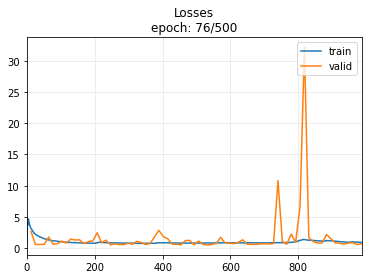

KeyboardInterrupt: 

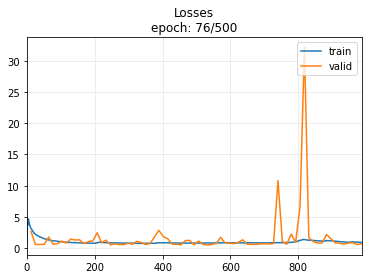

In [17]:
# model = ResNet(dls.vars, dls.c) 
# model = mWDN(dls.vars, dls.c, dls.len) #SIGKDD 18
# model = InceptionTime(dls.vars, dls.c)
# model = TSiT(dls.vars, dls.c,  dls.len) #ECCV 2020
# model = TSPerceiver(dls.vars, dls.c,  dls.len) #ICML 2021
# model = TST(dls.vars, dls.c,  dls.len) #SIGKDD 2021
learn = Learner(dls, model, metrics=[RocAucBinary(), accuracy],  cbs=ShowGraphCallback2())
learn.fit_one_cycle(500, lr_max=slice(1e-2))
valid_dl = dls.valid
valid_probas, valid_targets, valid_preds = learn.get_preds(dl=valid_dl, with_decoded=True)
y_test, type(valid_preds)
y_predicted = valid_preds.cpu().numpy()
print(y_predicted)
print((y_test == y_predicted).mean())
print("The weighted f1 score: ", f1_score(y_test, y_predicted, average='weighted'))



In [88]:
# learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropyFlat(), metrics=[RocAucBinary(), accuracy],  cbs=ShowGraphCallback2())
# learn.fit_one_cycle(10, lr_max=1e-5)
learn.plot_metrics()

AttributeError: 'ResNet' object has no attribute 'values'

In [86]:
learn.save_all(path='face', dls_fname='face_dls', model_fname='cwdn_resample', learner_fname='face_learner')

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck
Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [87]:
learn = load_learner_all(path='face', dls_fname='face_dls', model_fname='cwdn_resample', learner_fname='face_learner')
dls = learn.dls
valid_dl = dls.valid
b = next(iter(valid_dl))
b

(TSTensor(samples:32, vars:3, len:468, device=cuda:0),
 TensorCategory([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
         0, 0, 0, 0, 1, 0, 1, 0], device='cuda:0'))

In [ ]:
valid_probas, valid_targets, valid_preds = learn.get_preds(dl=valid_dl, with_decoded=True)
y_test, type(valid_preds)
y_predicted = valid_preds.cpu().numpy()

In [ ]:

print("The weighted f1 score: ", f1_score(y_test, y_predicted, average='weighted'))

The weighted f1 score:  0.44444444444444436


In [11]:
(valid_targets == valid_preds).float().mean()


TensorCategory(0.7805)

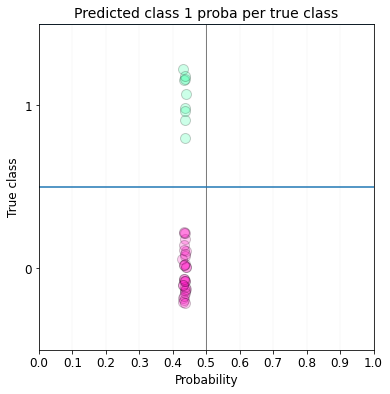

In [12]:
learn.show_probas()

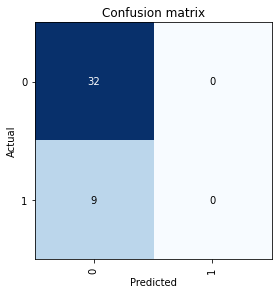

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.show_results()

In [10]:
skf = StratifiedKFold(n_splits=10)
face = np.array(face)
labels = np.array(labels)
sum_score = []
for train_index, test_index in skf.split(face, labels):
    #     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = face[train_index], face[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

        
#     ros = RandomOverSampler(random_state=0)
#     x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
#     sm = SMOTE(random_state=0)
#     x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)
#     ada = ADASYN(random_state=0)
#     x_train_resampled, y_train_resampled = ada.fit_resample(x_train, y_train)
#     rus = RandomUnderSampler(random_state=0)
#     x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)

    X, y, splits = combine_split_data([x_train, x_test], [y_train, y_test])
    # X, y, splits = combine_split_data([x_train_resampled, x_test], [y_train_resampled, y_test])
    print(X.shape)
    tfms  = [None, [Categorize()]]
    dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)

    dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=32, batch_tfms=TSStandardize(by_var=True))
#   dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[1], batch_tfms=[TSStandardize()], num_workers=0)

    # model = ResNet(dls.vars, dls.c) 
    # model = mWDN(dls.vars, dls.c, dls.len) #SIGKDD 18
    # model = InceptionTime(dls.vars, dls.c)
    # model = TSiT(dls.vars, dls.c,  dls.len) #ECCV 2020
    # model = TSPerceiver(dls.vars, dls.c,  dls.len) #ICML 2021
    model = TST(dls.vars, dls.c,  dls.len) #SIGKDD 2021

    learn = Learner(dls, model, metrics=accuracy)
    learn.fit_one_cycle(5, lr_max=1e-5)
    valid_dl = dls.valid
    valid_probas, valid_targets, valid_preds = learn.get_preds(dl=valid_dl, with_decoded=True)
    y_test, type(valid_preds)
    y_predicted = valid_preds.cpu().numpy()
    print(y_predicted)

    score = (valid_targets == valid_preds).float().mean()
    print(score.float())
    sum_score.append(score.float())
    
print("Max score:", np.max(sum_score))
print("Min score:", np.min(sum_score))
print("Avg score:", np.mean(sum_score))

(417, 3, 468)


epoch,train_loss,valid_loss,accuracy,time
0,0.790617,0.573837,0.785714,00:01
1,0.665651,0.528933,0.785714,00:01
2,0.618933,0.528128,0.785714,00:01
3,0.594464,0.528286,0.785714,00:01
4,0.588644,0.526770,0.785714,00:01


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
TensorCategory(0.7857)
(417, 3, 468)


epoch,train_loss,valid_loss,accuracy,time
0,0.558486,0.529679,0.785714,00:01
1,0.560658,0.536045,0.785714,00:01
2,0.557527,0.524952,0.785714,00:01
3,0.552460,0.529264,0.785714,00:01
4,0.541872,0.524426,0.785714,00:01


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
TensorCategory(0.7857)
(417, 3, 468)


epoch,train_loss,valid_loss,accuracy,time
0,0.659379,0.567821,0.761905,00:01
1,0.604853,0.552037,0.761905,00:01
2,0.583764,0.548804,0.761905,00:01
3,0.572361,0.546788,0.761905,00:01
4,0.567635,0.546350,0.761905,00:01


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
TensorCategory(0.7619)
(417, 3, 468)


epoch,train_loss,valid_loss,accuracy,time
0,0.571347,0.535170,0.761905,00:01
1,0.557529,0.543839,0.761905,00:01
2,0.552928,0.545105,0.761905,00:01
3,0.552585,0.547618,0.761905,00:01
4,0.550300,0.547665,0.761905,00:01


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
TensorCategory(0.7619)
(417, 3, 468)


epoch,train_loss,valid_loss,accuracy,time
0,0.576651,0.545819,0.761905,00:01
1,0.577904,0.558179,0.761905,00:01
2,0.564063,0.545984,0.761905,00:01
3,0.555014,0.550888,0.761905,00:01
4,0.544868,0.549708,0.761905,00:01


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
TensorCategory(0.7619)
(417, 3, 468)


epoch,train_loss,valid_loss,accuracy,time
0,1.030342,0.659438,0.785714,00:01
1,0.790591,0.575922,0.761905,00:01
2,0.706840,0.550863,0.761905,00:01
3,0.651148,0.549640,0.761905,00:01
4,0.620292,0.549739,0.761905,00:01


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
TensorCategory(0.7619)
(417, 3, 468)


epoch,train_loss,valid_loss,accuracy,time
0,0.718076,0.604899,0.761905,00:01
1,0.616490,0.570565,0.761905,00:01
2,0.593154,0.559460,0.761905,00:01
3,0.580515,0.559704,0.761905,00:01
4,0.573207,0.558468,0.761905,00:01


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
TensorCategory(0.7619)
(417, 3, 468)


epoch,train_loss,valid_loss,accuracy,time
0,0.669892,0.539208,0.780488,00:01
1,0.595171,0.531973,0.780488,00:01
2,0.574688,0.530815,0.780488,00:01
3,0.564058,0.529105,0.780488,00:01
4,0.556875,0.528760,0.780488,00:01


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
TensorCategory(0.7805)
(417, 3, 468)


epoch,train_loss,valid_loss,accuracy,time
0,0.811091,0.589981,0.780488,00:01
1,0.663469,0.538991,0.780488,00:01
2,0.617723,0.525102,0.780488,00:01
3,0.594498,0.532060,0.780488,00:01
4,0.582511,0.529841,0.780488,00:01


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
TensorCategory(0.7805)
(417, 3, 468)


epoch,train_loss,valid_loss,accuracy,time
0,0.646387,0.537790,0.780488,00:01
1,0.612871,0.525541,0.780488,00:01
2,0.585648,0.541883,0.780488,00:01
3,0.573290,0.522344,0.780488,00:01
4,0.562078,0.520697,0.780488,00:01


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
TensorCategory(0.7805)
Max score: 0.78571427
Min score: 0.7619048
Avg score: 0.7722416


In [118]:
def get_iris_landmarks(csv_path):
    df = pd.read_csv(csv_path, usecols=[1,2,3,4])
    # print(df.head(10))
    df_leftx = df['left_x']
    df_lefty = df['left_y']
    df_rightx = df['right_x']
    df_righty = df['right_y']
    iris_left_x = df_leftx.values.tolist()
    iris_left_y = df_lefty.values.tolist()
    iris_right_x = df_rightx.values.tolist()
    iris_right_y = df_righty.values.tolist()

    print("There are {num} irises recorded from this sample.".format(num = np.array(df_leftx).shape[0]))
    print(np.array(iris_left_x).shape)

    return iris_left_x, iris_left_y, iris_right_x, iris_right_y, (np.array(df_leftx).shape[0])

In [119]:
def get_avg_landmarks(leftx, lefty, rightx, righty, iris_num):
    avg_leftx = np.sum(leftx) / iris_num
    avg_lefty = np.sum(lefty) / iris_num
    avg_rightx = np.sum(rightx) / iris_num
    avg_righty = np.sum(righty) / iris_num

    return avg_leftx, avg_lefty, avg_rightx, avg_righty

In [120]:
if __name__ == '__main__':
    iris = []
    labels = []
    # 标签
    label = {b'healthy':0, b'unhealthy':1}

    root = os.path.dirname(os.getcwd())
    print("root direction", root)

    dataset_class = os.listdir(root + '/Dataset')
    print(dataset_class)

    for sample_class in dataset_class:
        sample_class_path = root + '/Dataset' + '/' + sample_class
        # print(sample_class_path)
        sample_file = os.listdir(sample_class_path)
        # print(sample_file)

        for detail in sample_file:
            detail_path = sample_class_path + '/' + detail
            sample_detail = os.listdir(detail_path)
            print(detail_path)

            for csv_file in sample_detail:
                if 'iris_location' in csv_file:
                    #打开csv文件并读取人脸信息
                    print(detail_path + '/' + csv_file)
                    left_x, left_y, right_x, right_y, iris_num = get_iris_landmarks(detail_path + '/' + csv_file)
                    # if face_num == 0:
                    #     error = detail
                    #     continue
                    avg_leftx, avg_lefty, avg_rightx, avg_righty = get_avg_landmarks(left_x, left_y, right_x, right_y, iris_num)
                    # temp_iris = avg_leftx + avg_lefty + avg_rightx + avg_righty
                    # print(np.array(temp_iris).shape)
                    iris.append(avg_leftx)
                    iris.append(avg_lefty)
                    iris.append(avg_rightx)
                    iris.append(avg_righty)
                    print(np.array(iris).shape)

                    #加上标签
                    if sample_class == 'healthy':
                        labels.append(0)
                    elif sample_class == 'unhealthy':
                        labels.append(1)

                    # face = face.reshape(-1, 1404)
                    # print(np.array(face).shape)

    iris = np.array(iris).reshape(-1, 4)
    print(iris)
    print(np.array(iris).shape)
    # print(labels)
    print(np.array(labels).shape)

root direction f:\Project\AMH
['healthy', 'unhealthy']
f:\Project\AMH/Dataset/healthy/00002-0101
f:\Project\AMH/Dataset/healthy/00002-0101/iris_location.csv
There are 209 irises recorded from this sample.
(209,)
(4,)
f:\Project\AMH/Dataset/healthy/00002-0102
f:\Project\AMH/Dataset/healthy/00002-0102/iris_location.csv
There are 224 irises recorded from this sample.
(224,)
(8,)
f:\Project\AMH/Dataset/healthy/00002-0103
f:\Project\AMH/Dataset/healthy/00002-0103/iris_location.csv
There are 158 irises recorded from this sample.
(158,)
(12,)
f:\Project\AMH/Dataset/healthy/00002-0105
f:\Project\AMH/Dataset/healthy/00002-0105/iris_location.csv
There are 248 irises recorded from this sample.
(248,)
(16,)
f:\Project\AMH/Dataset/healthy/00002-0106
f:\Project\AMH/Dataset/healthy/00002-0106/iris_location.csv
There are 216 irises recorded from this sample.
(216,)
(20,)
f:\Project\AMH/Dataset/healthy/00002-0107
f:\Project\AMH/Dataset/healthy/00002-0107/iris_location.csv
There are 292 irises recorded 